## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

#### CSUSHPISA: S&P/Case-Shiller U.S. National Home Price Index
#### HNFSEPUSSA: New One Family Homes for Sale in the United States
#### HOUST1F: New Privately-Owned Housing Units Started: Single-Family Units
#### HSN1F: New One Family Houses Sold: United States
#### INTDSRUSM193N: Interest Rates, Discount Rate for United States
#### LFACTTTTUSM657S: Active Population: Aged 15 and over: All Persons for United States
#### MSACSR: Monthly Supply of New Houses in the United States
#### NA000334Q: Gross Domestic Product
#### NASDAQCOM: NASDAQ Composite Index
#### PERMIT: New Privately-Owned Housing Units Authorized in Permit-Issuing Places: Total Units
#### PERMIT1: New Privately-Owned Housing Units Authorized in Permit-Issuing Places: Single-Family Units
#### QUSR628BIS: Real Residential Property Prices for United States
#### RSAHORUSQ156S: Homeownership Rate in the United States
#### TTLCONS: Total Construction Spending: Total Construction in the United States
#### UNRATE: Unemployment Rate
#### CPI (Adjusted Price)
#### Median Home Prices (NSA)

## Dataset

In [2]:
df = pd.read_csv('final_dataset.csv')
df.head()

,DATE,HNFSEPUSSA,HOUST1F,HSN1F,INTDSRUSM193N,LFACTTTTUSM657S,MSACSR,NA000334Q,NASDAQCOM,PERMIT,PERMIT1,QUSR628BIS,RSAHORUSQ156S,TTLCONS,UNRATE,Median Home Price (NSA),CPI-Adjusted Price,CSUSHPISA
0,2000-01-01,311.0,1268,873,5.00,1.490972,4.3,2448892.0,4013.494000,1727.0,1277.0,95.3071,67.1,784940.0,4.0,131559.13,239289.53,100.551
1,2000-02-01,299.0,1255,856,5.24,0.132849,4.3,2448892.0,4410.871000,1692.0,1241.0,95.3071,67.1,793737.0,4.1,131318.85,237445.83,101.339
2,2000-03-01,313.0,1313,900,5.34,-0.015443,4.3,2448892.0,4802.988261,1651.0,1253.0,95.3071,67.1,809459.0,4.0,132827.82,238210.25,102.127
3,2000-04-01,305.0,1275,841,5.50,0.222559,4.4,2569266.0,3863.637368,1597.0,1192.0,96.7197,67.3,804766.0,3.8,134096.51,240345.10,102.922
4,2000-05-01,305.0,1230,857,5.71,-0.254289,4.4,2569266.0,3528.416818,1543.0,1182.0,96.7197,67.3,805005.0,4.0,135144.14,241940.32,103.678


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [4]:
# Standardization (Scaling Data)
x_scaled= scaler.fit_transform(df.iloc[:,1:])

In [5]:
df_1 = pd.DataFrame(x_scaled)

In [6]:
df_1.insert(0,'DATE', df['DATE'])

In [7]:
df_1.columns=df.columns

In [8]:
df_1.head()

,DATE,HNFSEPUSSA,HOUST1F,HSN1F,INTDSRUSM193N,LFACTTTTUSM657S,MSACSR,NA000334Q,NASDAQCOM,PERMIT,PERMIT1,QUSR628BIS,RSAHORUSQ156S,TTLCONS,UNRATE,Median Home Price (NSA),CPI-Adjusted Price,CSUSHPISA
0,2000-01-01,0.009334,0.768452,0.579709,1.512912,4.027987,-0.766575,-1.667580,0.095683,0.862170,0.880645,-1.339622,0.340744,-1.267663,-1.006607,-1.842330,-1.333216,-1.997023
1,2000-02-01,-0.097181,0.736414,0.522993,1.643216,0.218322,-0.766575,-1.667580,0.263995,0.787630,0.789623,-1.339622,0.340744,-1.225353,-0.955945,-1.848898,-1.393490,-1.971271
2,2000-03-01,0.027087,0.879356,0.669787,1.697509,-0.197651,-0.766575,-1.667580,0.430078,0.700311,0.819964,-1.339622,0.340744,-1.149736,-1.006607,-1.807651,-1.368500,-1.945519
3,2000-04-01,-0.043923,0.785704,0.472950,1.784379,0.469969,-0.714422,-1.529262,0.032211,0.585305,0.665731,-1.255482,0.448550,-1.172308,-1.107931,-1.772971,-1.298707,-1.919538
4,2000-05-01,-0.043923,0.674801,0.526329,1.898395,-0.867636,-0.714422,-1.529262,-0.109774,0.470299,0.640447,-1.255482,0.448550,-1.171158,-1.006607,-1.744334,-1.246556,-1.894832


### Visualizations

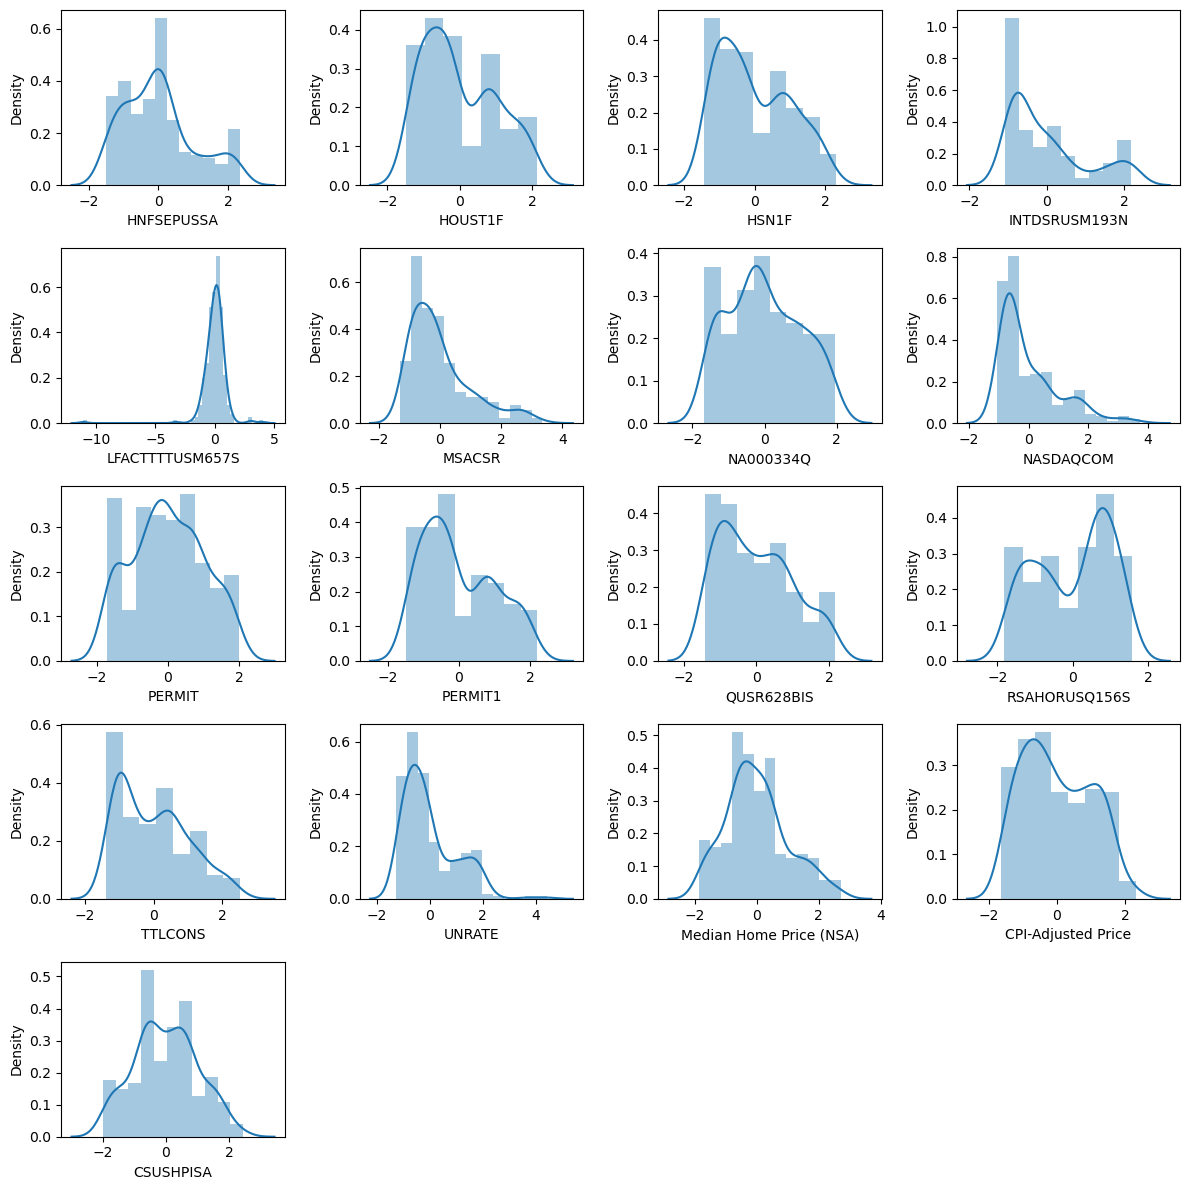

In [9]:
# visualizing distribution of each feature

fig, axes = plt.subplots(5, 4, figsize=(12, 12))

axes = axes.flatten()

for i in range(1, 18):
    sns.distplot(df_1.iloc[:, i], kde=True, ax=axes[i - 1])
    

for i in range(17, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()

plt.show()

**Result** : Some features are normally distributed

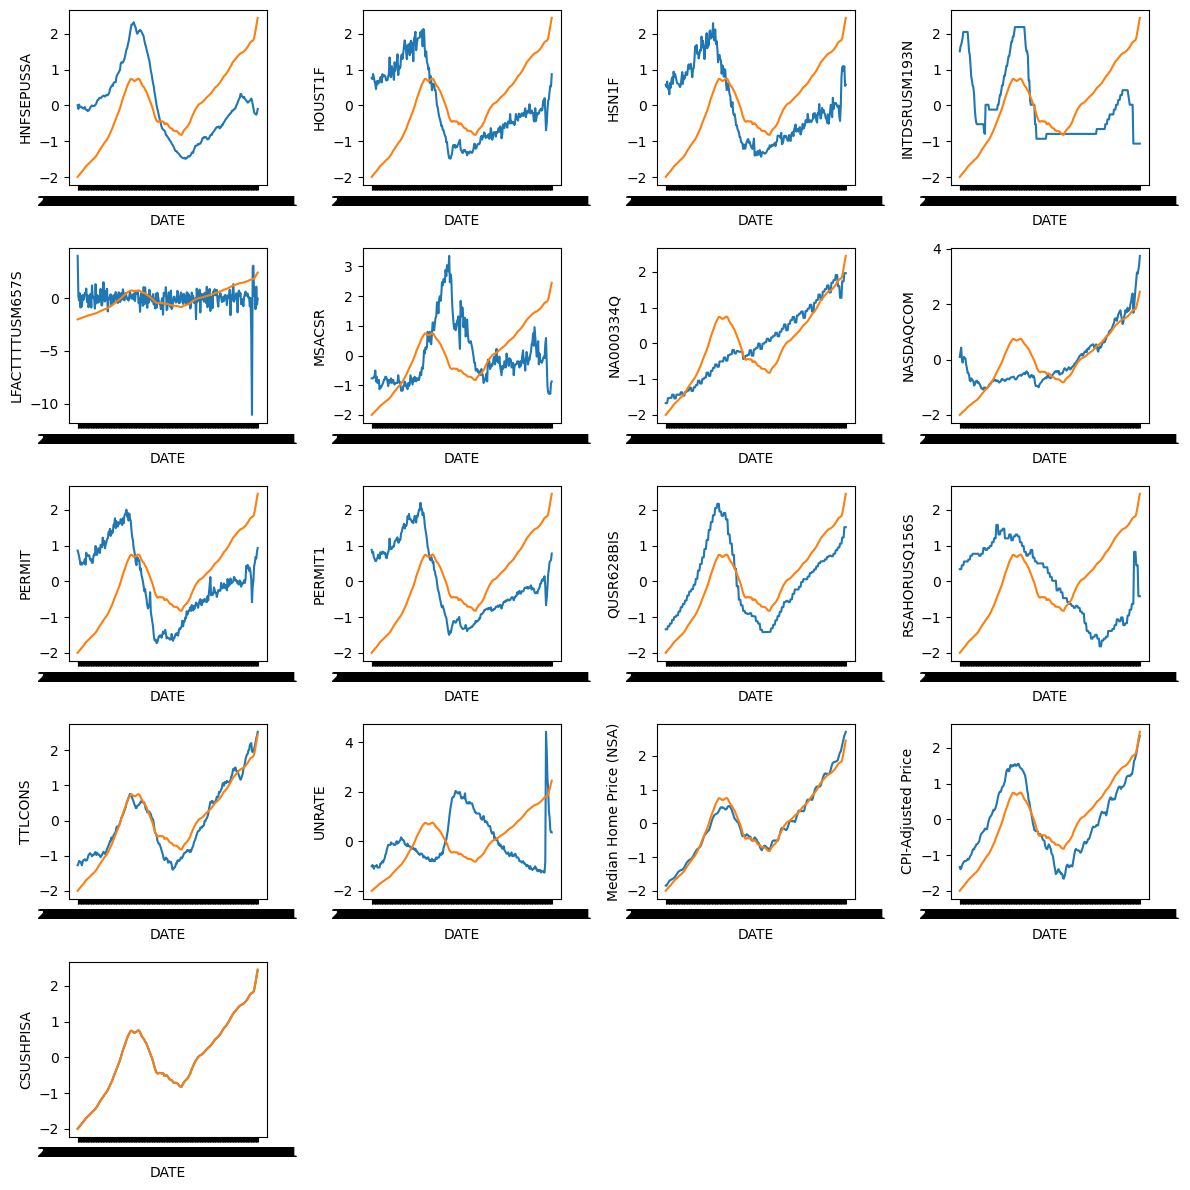

In [10]:
# visualizing trend of each feature with target feature

fig, axes = plt.subplots(5, 4, figsize=(12, 12))

axes = axes.flatten()

for i in range(1, 18):
    sns.lineplot(x=df_1.iloc[:, 0],y=df_1.iloc[:,i], ax=axes[i - 1])
    sns.lineplot(x=df_1.iloc[:, 0],y=df_1.iloc[:,-1], ax=axes[i - 1])
    

for i in range(17, len(axes)):
    fig.delaxes(axes[i])


plt.tight_layout()
plt.show()

## Correlation Matrix

<Axes: >

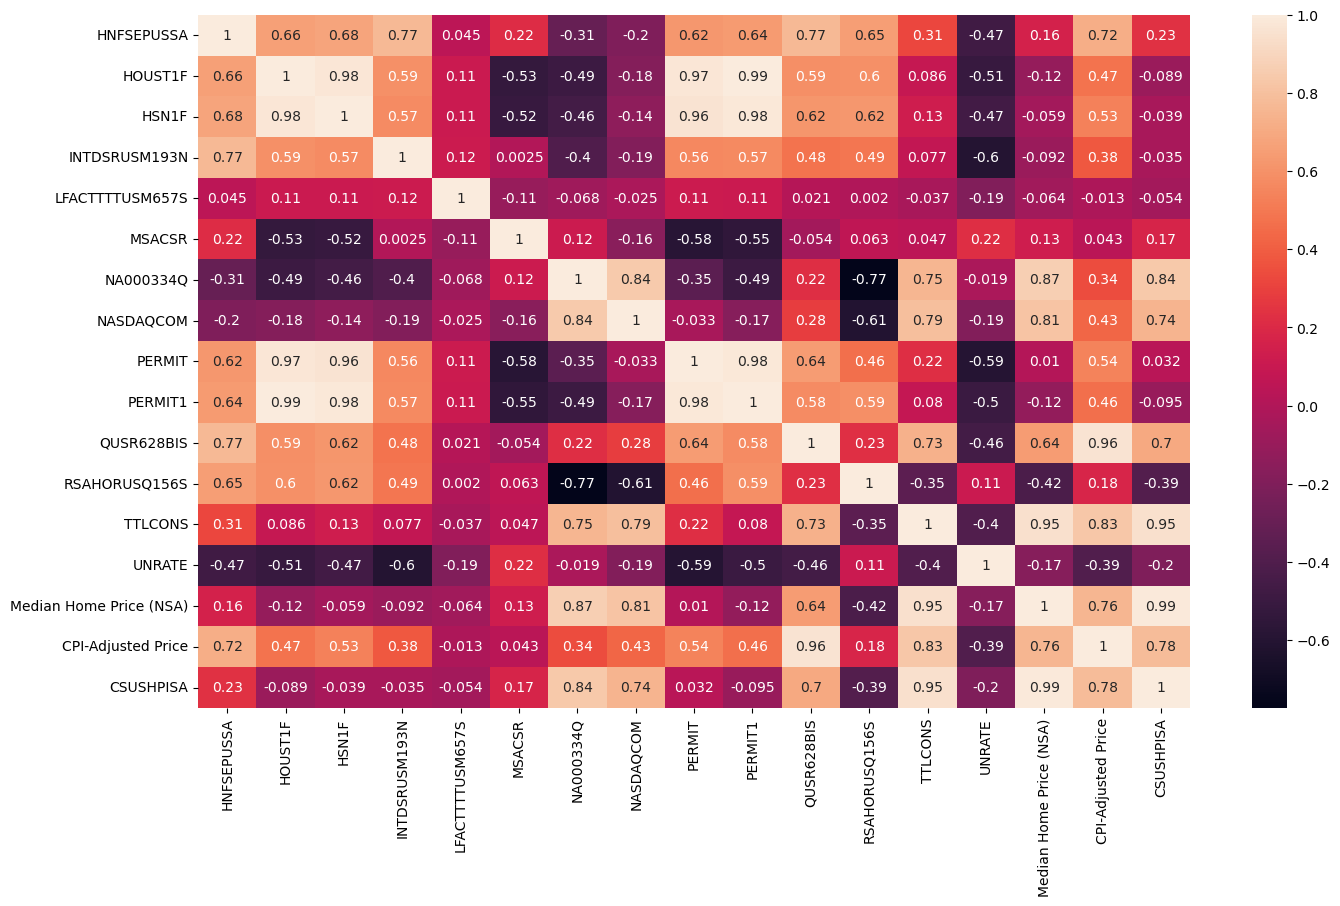

In [11]:
# checking correlation and multicollinearity between features
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True)

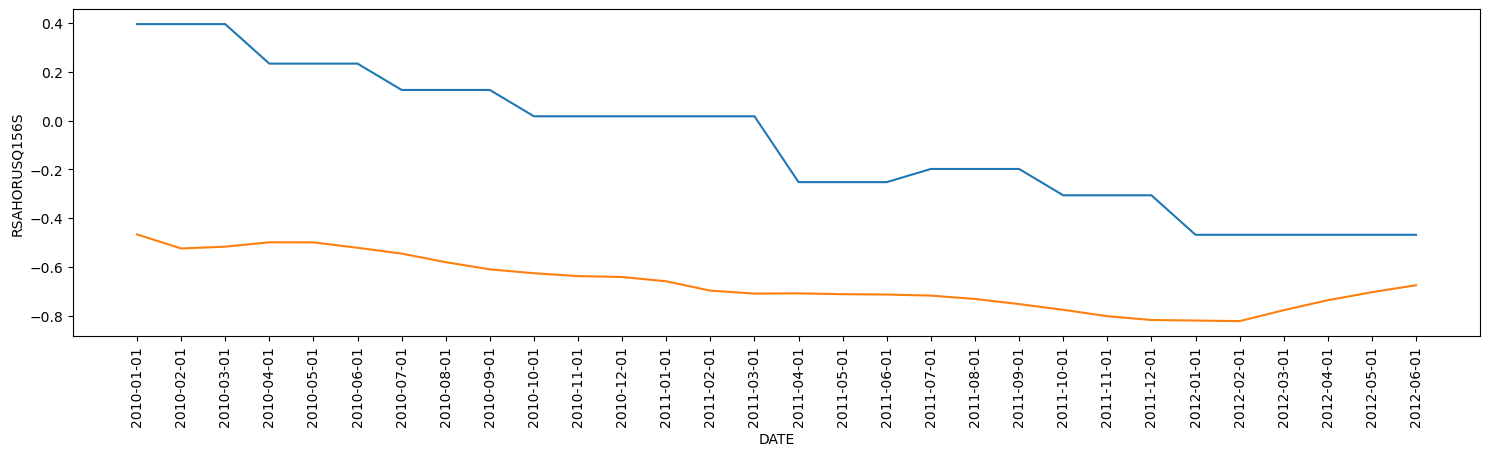

In [12]:
# checking the trend for specific time window

fig = plt.figure(figsize=(15,4))
sns.lineplot(x=df_1.iloc[120:150,0], y=df_1.iloc[120:150,-6])
sns.lineplot(x=df_1.iloc[120:150, 0],y=df_1.iloc[120:150,-1])
plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

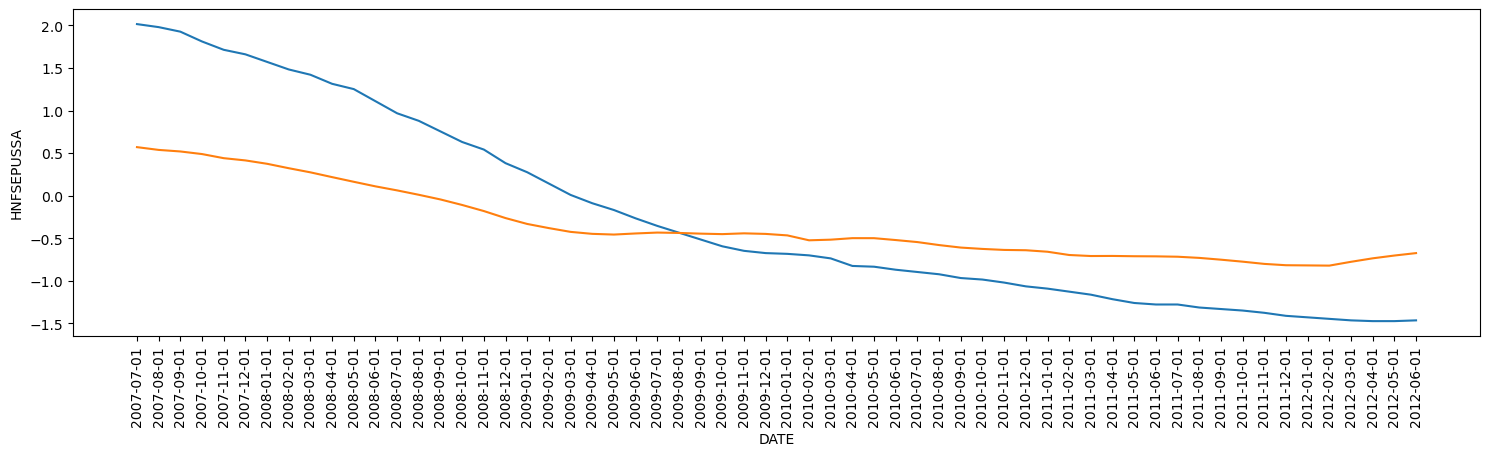

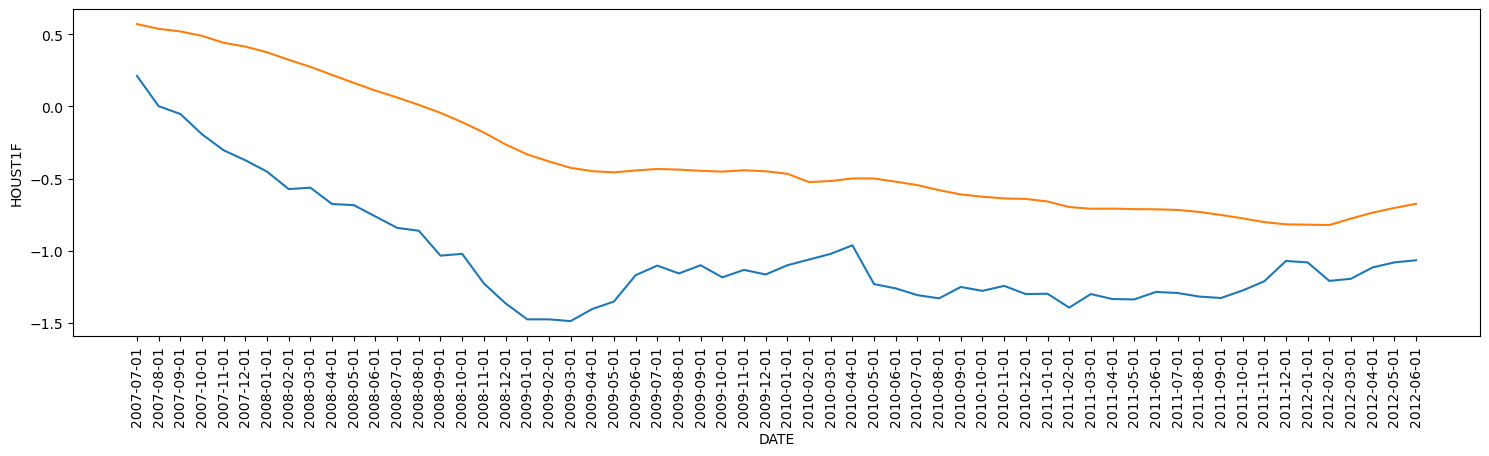

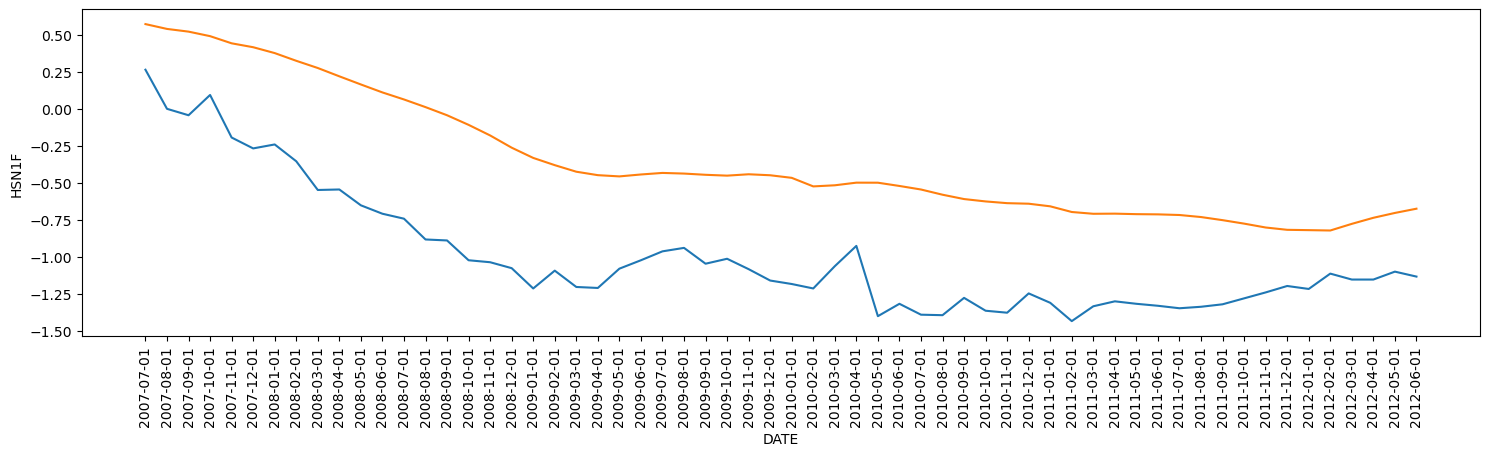

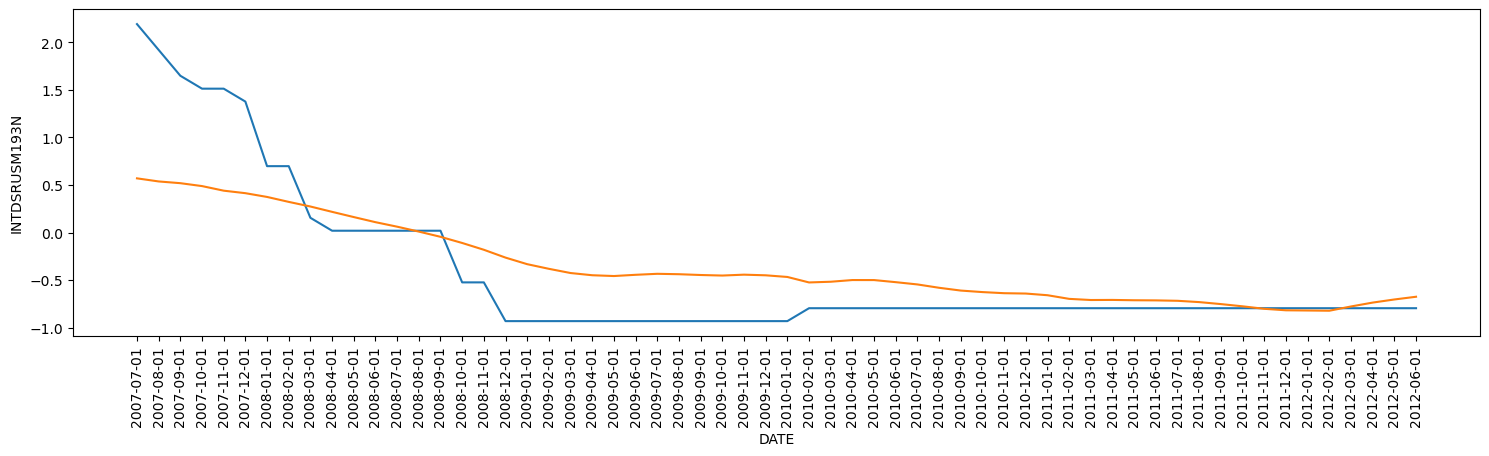

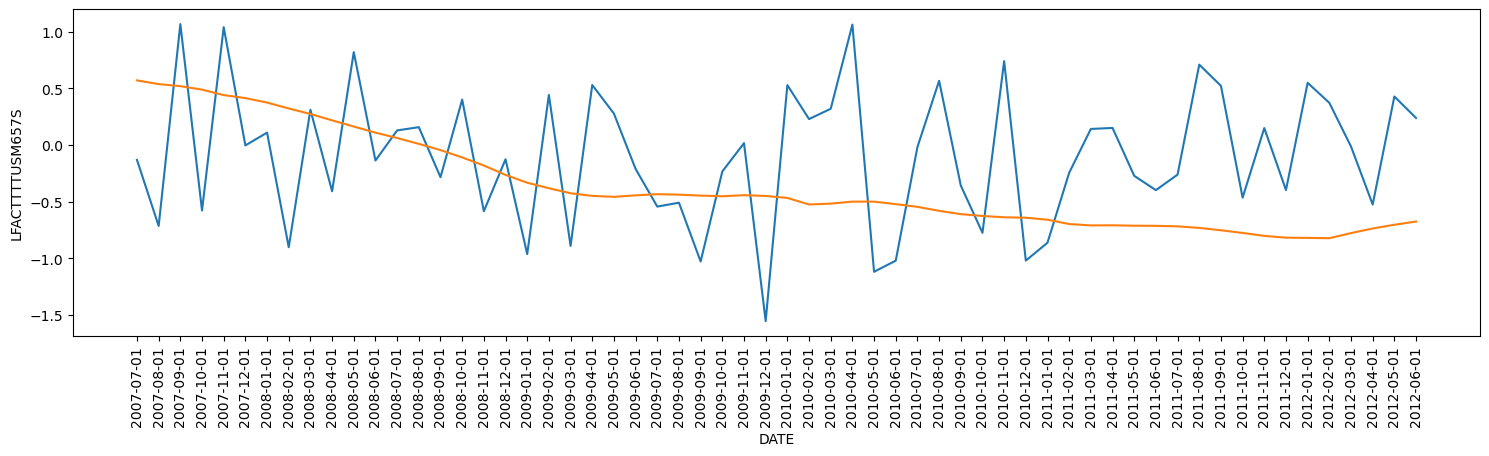

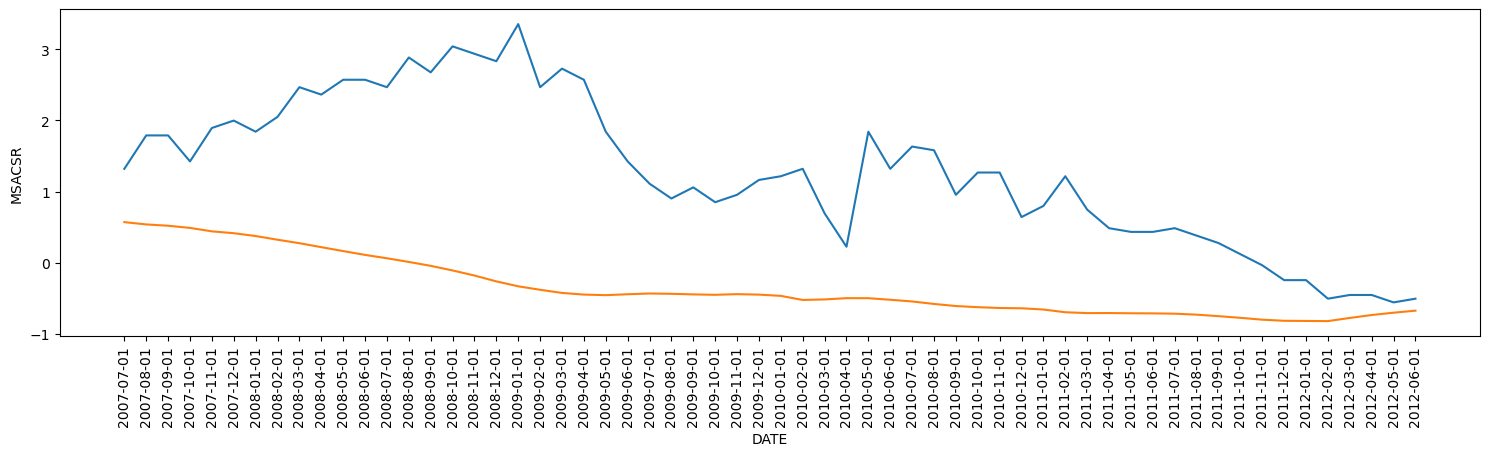

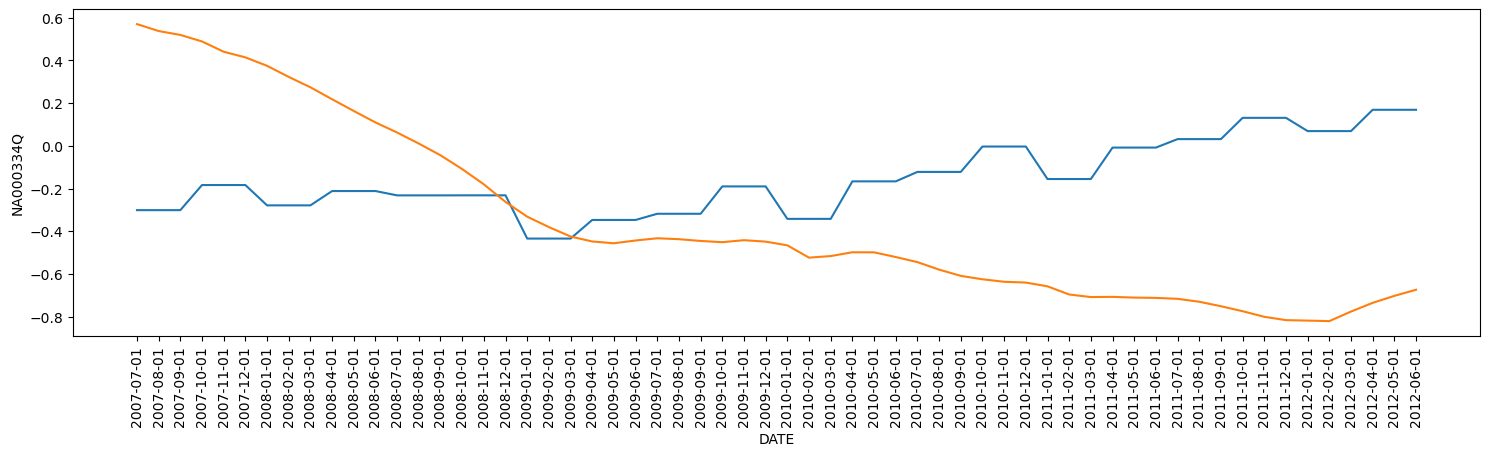

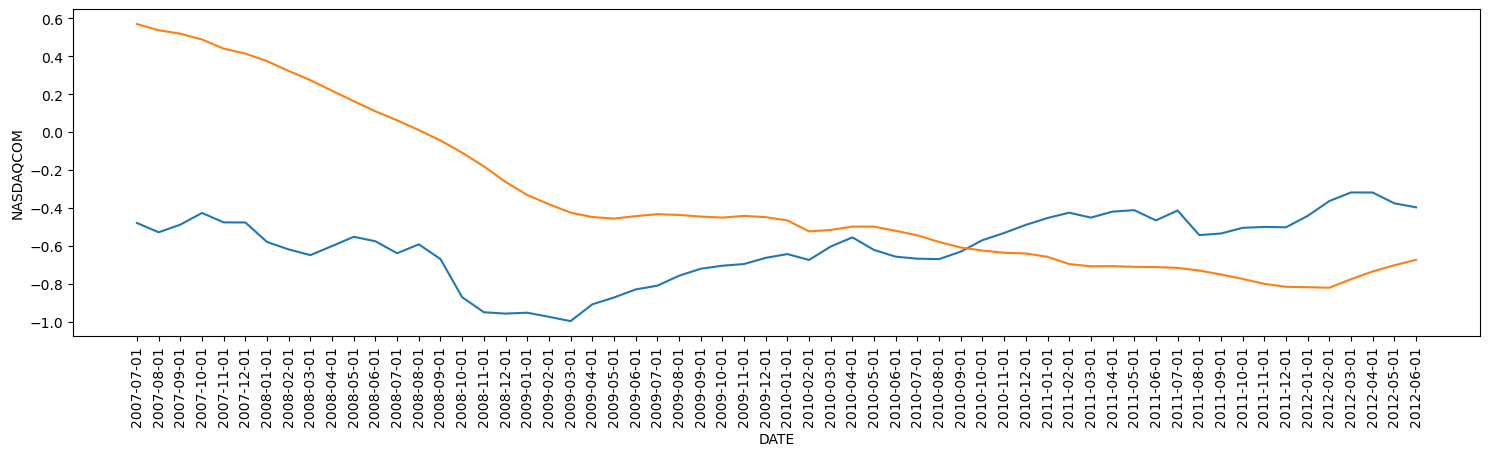

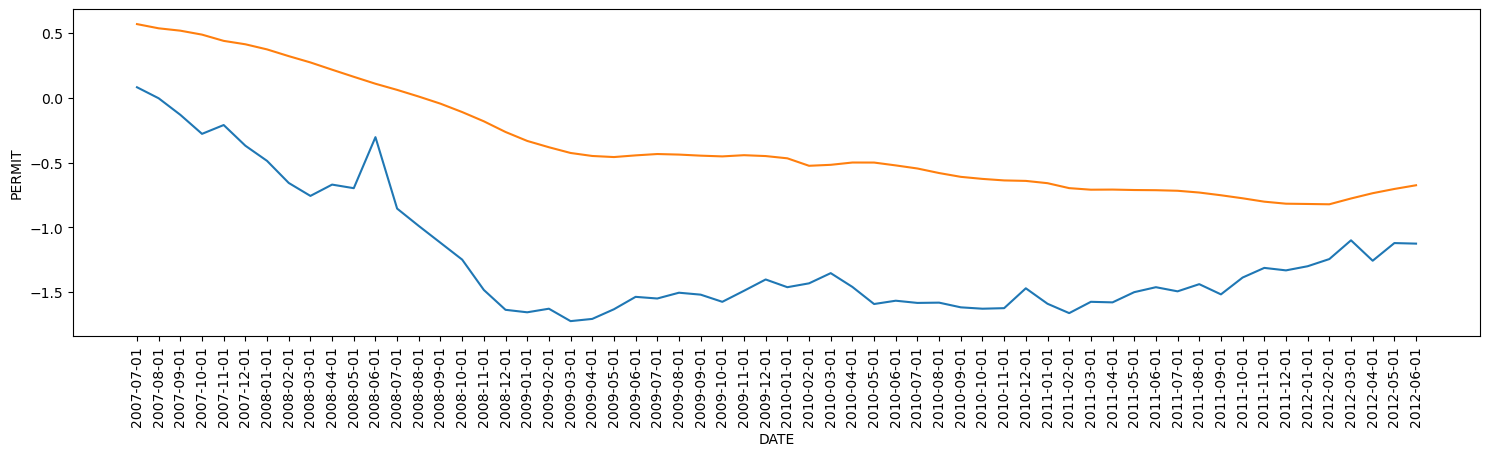

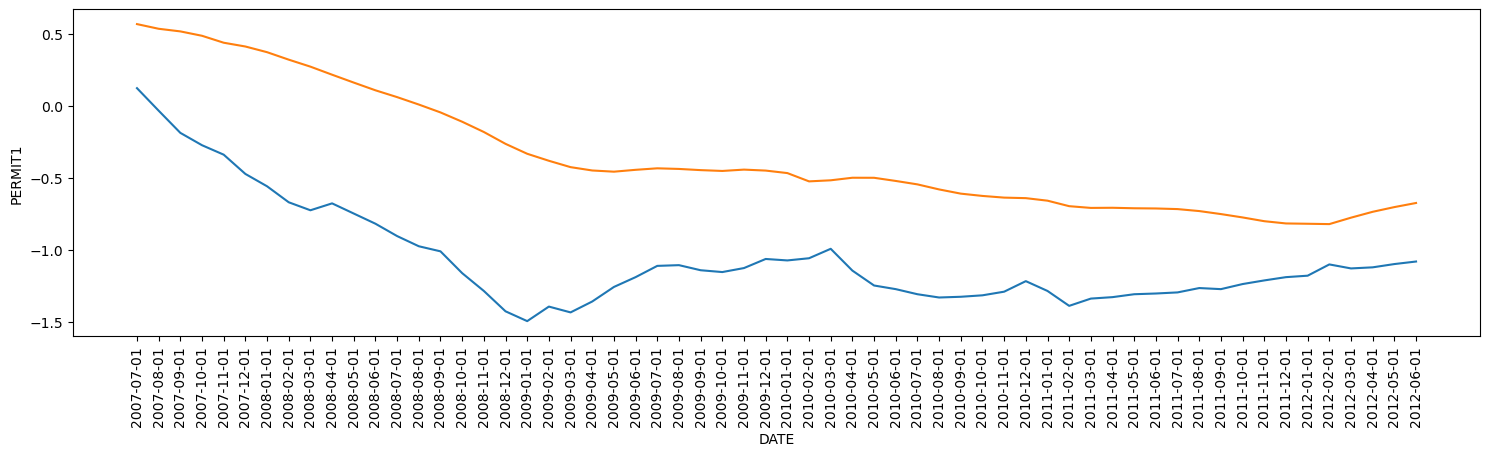

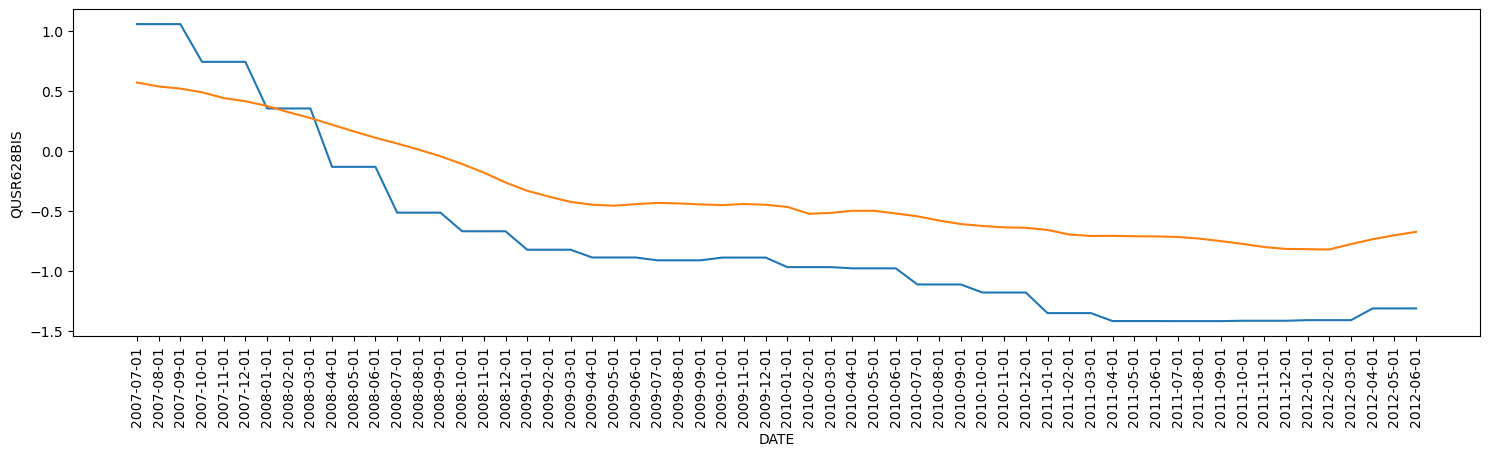

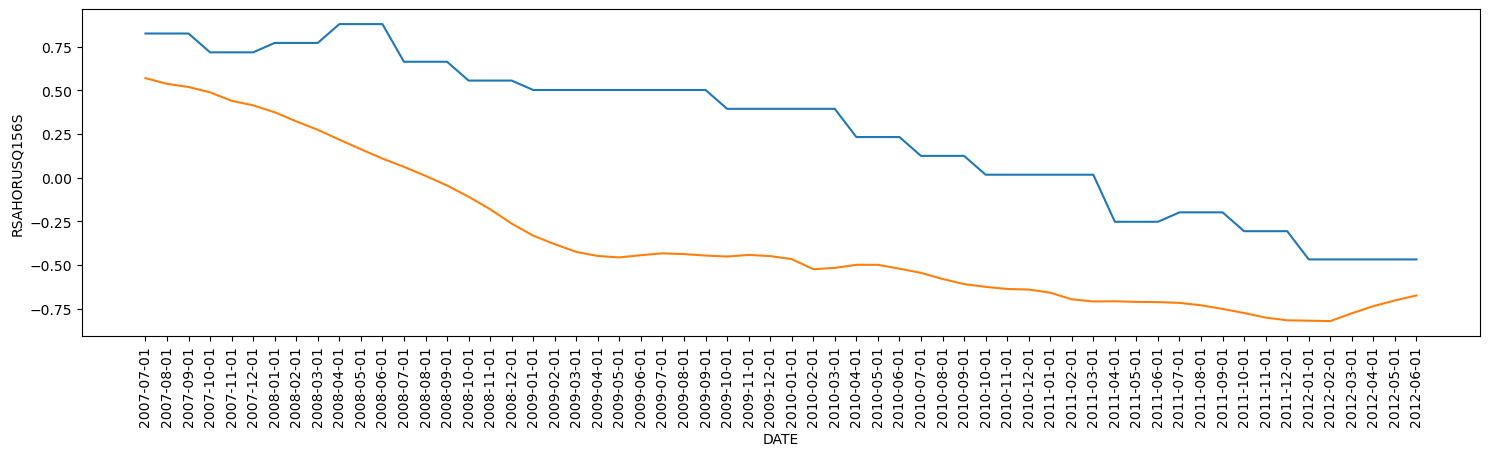

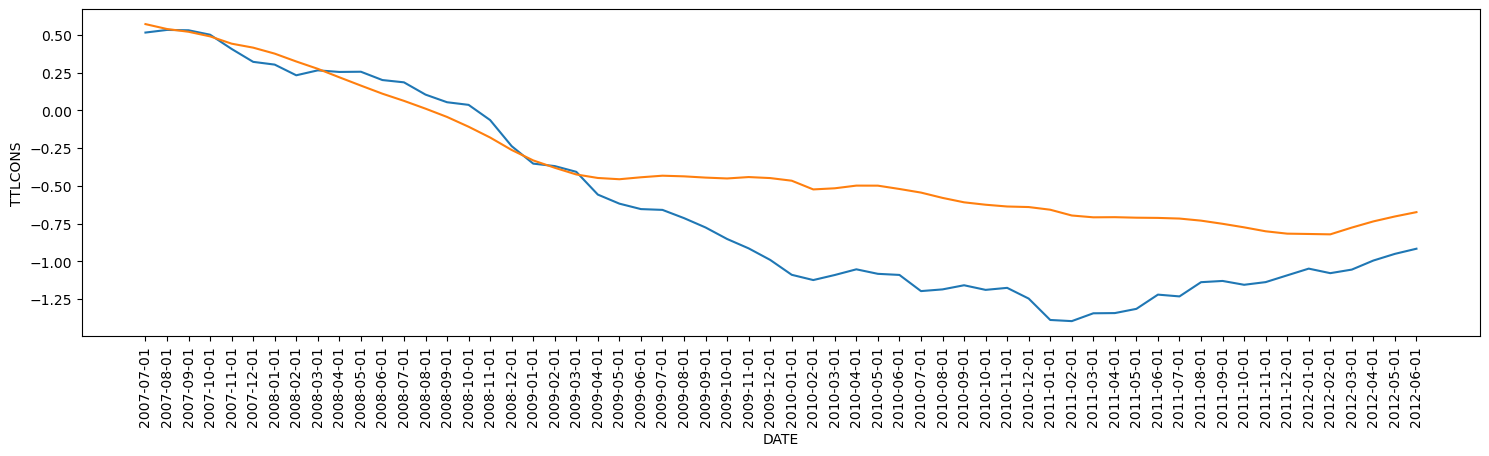

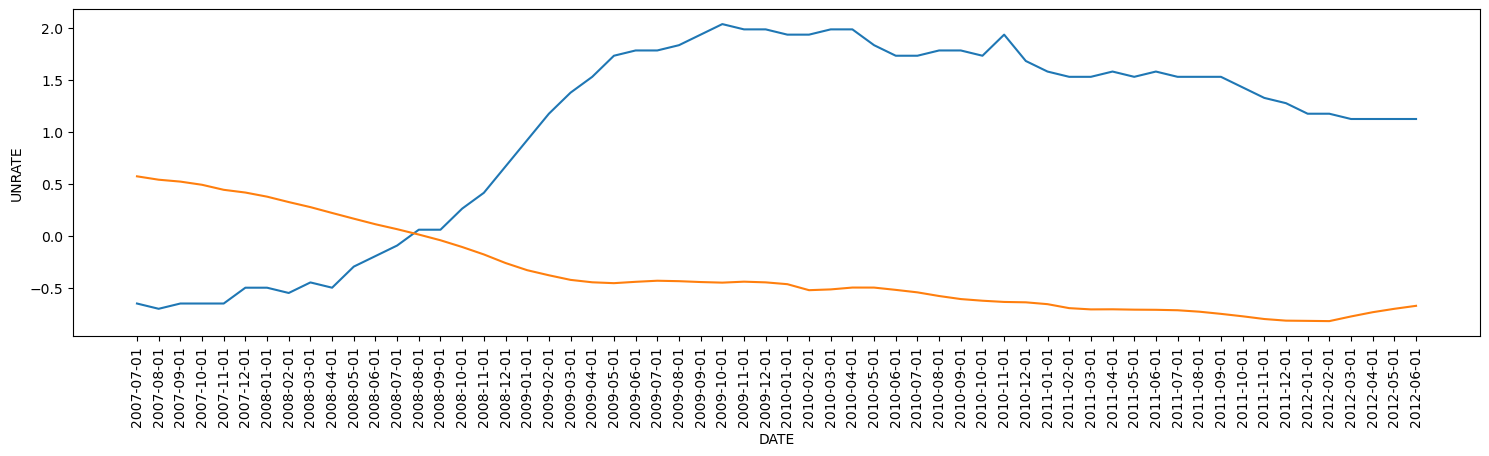

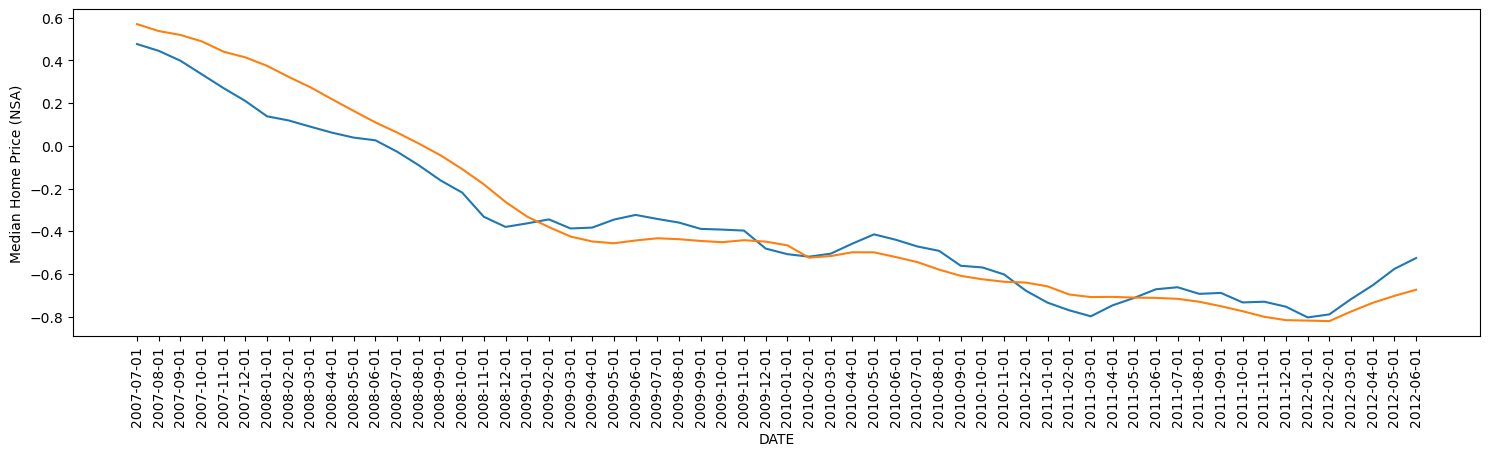

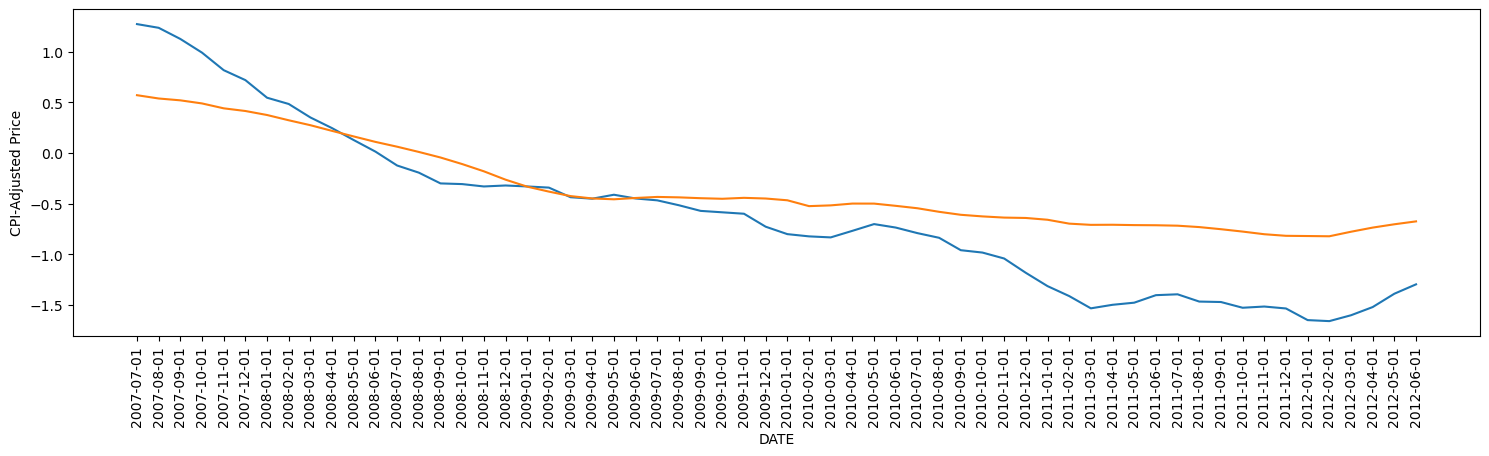

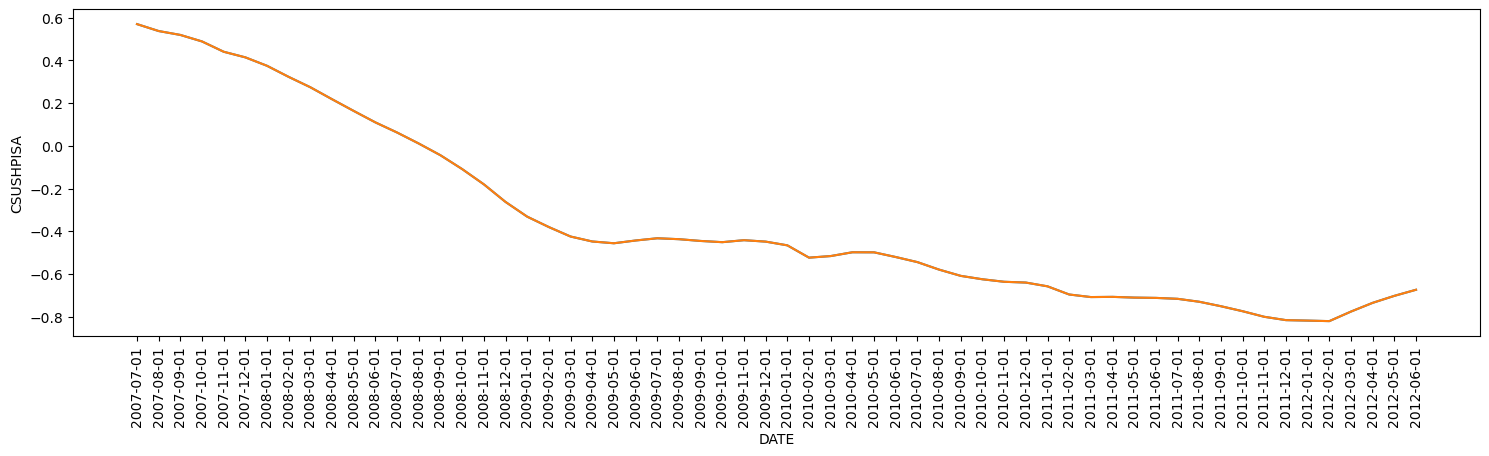

In [13]:
for i in range(1, 18):
    fig = plt.figure(figsize=(15,4))
    sns.lineplot(x=df_1.iloc[90:150, 0],y=df_1.iloc[:,i])
    sns.lineplot(x=df_1.iloc[90:150, 0],y=df_1.iloc[:,-1])
    plt.tight_layout()
    plt.xticks(rotation = 90)
    plt.show()

## Model Building

In [14]:
x = df.iloc[:,1:-1] #Independengt Columns
y = df.iloc[:,-1]   #Dependent Column

In [15]:
x.head()

,HNFSEPUSSA,HOUST1F,HSN1F,INTDSRUSM193N,LFACTTTTUSM657S,MSACSR,NA000334Q,NASDAQCOM,PERMIT,PERMIT1,QUSR628BIS,RSAHORUSQ156S,TTLCONS,UNRATE,Median Home Price (NSA),CPI-Adjusted Price
0,311.0,1268,873,5.00,1.490972,4.3,2448892.0,4013.494000,1727.0,1277.0,95.3071,67.1,784940.0,4.0,131559.13,239289.53
1,299.0,1255,856,5.24,0.132849,4.3,2448892.0,4410.871000,1692.0,1241.0,95.3071,67.1,793737.0,4.1,131318.85,237445.83
2,313.0,1313,900,5.34,-0.015443,4.3,2448892.0,4802.988261,1651.0,1253.0,95.3071,67.1,809459.0,4.0,132827.82,238210.25
3,305.0,1275,841,5.50,0.222559,4.4,2569266.0,3863.637368,1597.0,1192.0,96.7197,67.3,804766.0,3.8,134096.51,240345.10
4,305.0,1230,857,5.71,-0.254289,4.4,2569266.0,3528.416818,1543.0,1182.0,96.7197,67.3,805005.0,4.0,135144.14,241940.32


In [16]:
y.head()

0    100.551
1    101.339
2    102.127
3    102.922
4    103.678
Name: CSUSHPISA, dtype: float64

### Data Splitting into Train and Test

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3 , random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Lasso Regression

In [20]:
from sklearn import linear_model
from sklearn.metrics import r2_score

reg_l = linear_model.Lasso(alpha=0.5)
reg_l.fit(x_train, y_train)

Lasso(alpha=0.5)

In [21]:
y_pred = reg_l.predict(x_test)

In [22]:
r2_score(y_test, y_pred)

0.993878848436414

#### r2 Score : 0.9938

## Important Features

In [23]:
coef = reg_l.coef_
print("Lasso Coefficients ::>>")
for feature, coe in zip(x, coef):
    print(f"{feature} : {coe}")

Lasso Coefficients ::>>
HNFSEPUSSA : 0.0
HOUST1F : -0.0
HSN1F : -0.0
INTDSRUSM193N : -0.0
LFACTTTTUSM657S : -0.0
MSACSR : 2.1254305569963194
NA000334Q : 7.9803246100136755
NASDAQCOM : -0.0
PERMIT : -0.0
PERMIT1 : -0.0
QUSR628BIS : 7.796871418558234
RSAHORUSQ156S : -0.0
TTLCONS : 0.0
UNRATE : 0.0
Median Home Price (NSA) : 17.948971772668987
CPI-Adjusted Price : 0.0


* **Median Home Price (NSA)** have the higgest influence on Home Price

In [24]:
y_pred = reg_l.predict(x_test)

In [25]:
print(r2_score(y_test, y_pred))

0.993878848436414


### RIDGE Regression

In [26]:
reg_r = linear_model.Ridge(alpha=0.5)
reg_r.fit(x_train, y_train)

Ridge(alpha=0.5)

In [27]:
y_pred = reg_r.predict(x_test)

In [28]:
print(r2_score(y_test, y_pred))

0.9974414977269119


In [29]:
coefficients = reg_r.coef_

### ElasticNet Regression

In [30]:
from sklearn.linear_model import ElasticNet

In [31]:
elastic = ElasticNet(alpha=0.1, l1_ratio=0.3)
elastic.fit(x_train, y_train)
y_pred = elastic.predict(x_test)

In [32]:
r2_score(y_test, y_pred)

0.993039094471543

In [33]:
check = dict.fromkeys(x.columns)

#### Manual Hyperparamter Tuning for alpha and L1_ratio

In [34]:
for i in np.arange(0.7,0.9,0.05):    
    for j in np.arange(0.8,1.1,0.1):
        print(f"l1_ratio: {i}, Alpha: {j}")
        elastic = ElasticNet(alpha=j, l1_ratio=i)
        elastic.fit(x_train, y_train)
        coef = elastic.coef_
        y_pred = elastic.predict(x_test)
        c=0
        r2 = r2_score(y_test, y_pred)
        for feat, value in zip(x, coef):
            check[feat]=value
            if check[feat]==0:
                c+=1
                print(feat,value,r2,i)
        print(f"count = {c}")
        print("\n")

l1_ratio: 0.7, Alpha: 0.8
HNFSEPUSSA 0.0 0.9811214275198566 0.7
LFACTTTTUSM657S -0.0 0.9811214275198566 0.7
count = 2


l1_ratio: 0.7, Alpha: 0.9
HNFSEPUSSA 0.0 0.9788878793472658 0.7
LFACTTTTUSM657S -0.0 0.9788878793472658 0.7
count = 2


l1_ratio: 0.7, Alpha: 1.0
HNFSEPUSSA 0.0 0.9766043393167834 0.7
LFACTTTTUSM657S -0.0 0.9766043393167834 0.7
UNRATE 0.0 0.9766043393167834 0.7
count = 3


l1_ratio: 0.7, Alpha: 1.1
HNFSEPUSSA 0.0 0.9743329585978737 0.7
INTDSRUSM193N -0.0 0.9743329585978737 0.7
LFACTTTTUSM657S -0.0 0.9743329585978737 0.7
UNRATE 0.0 0.9743329585978737 0.7
count = 4


l1_ratio: 0.75, Alpha: 0.8
HNFSEPUSSA 0.0 0.9827012264494764 0.75
LFACTTTTUSM657S -0.0 0.9827012264494764 0.75
count = 2


l1_ratio: 0.75, Alpha: 0.9
HNFSEPUSSA 0.0 0.9806594824106877 0.75
LFACTTTTUSM657S -0.0 0.9806594824106877 0.75
count = 2


l1_ratio: 0.75, Alpha: 1.0
HNFSEPUSSA 0.0 0.9786663707540217 0.75
INTDSRUSM193N -0.0 0.9786663707540217 0.75
LFACTTTTUSM657S -0.0 0.9786663707540217 0.75
UNRATE 0.0

* obtained alpha = 1 and L1_ratio = 0.75

In [35]:
elastic = ElasticNet(alpha=1, l1_ratio=0.75)
elastic.fit(x_train, y_train)
coef = elastic.coef_
y_pred = elastic.predict(x_test)
r2 = r2_score(y_test, y_pred)
r2

0.9786663707540217

### Factors that have impact on Home Prices

In [36]:
coefficients = list(zip(x, coef))
sorted(coefficients,key=lambda x: x[1],reverse=True)

[('Median Home Price (NSA)', 7.8412146202290955),
 ('NA000334Q', 6.726545191604583),
 ('QUSR628BIS', 5.496407060089823),
 ('TTLCONS', 5.444653869055052),
 ('CPI-Adjusted Price', 4.801238116051922),
 ('NASDAQCOM', 1.3826402354067),
 ('MSACSR', 1.3044128464295797),
 ('HNFSEPUSSA', 0.0),
 ('INTDSRUSM193N', -0.0),
 ('LFACTTTTUSM657S', -0.0),
 ('UNRATE', 0.0),
 ('PERMIT', -0.11384582189968068),
 ('HSN1F', -0.43066674803179955),
 ('RSAHORUSQ156S', -0.6564781067439437),
 ('HOUST1F', -0.9035361549304147),
 ('PERMIT1', -0.9922315735376057)]